In [355]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torch import tensor 
import numpy as np
import matplotlib.pyplot as plt

torch.set_warn_always(False)

In [356]:
dir(torch.autograd.Function)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_backward_cls',
 '_compiled_autograd_backward_state',
 '_compiled_autograd_key',
 '_get_compiled_autograd_symints',
 '_is_compiled_autograd_tracing',
 '_materialize_non_diff_grads',
 '_raw_saved_tensors',
 '_register_hook',
 '_register_hook_dict',
 '_sequence_nr',
 '_set_sequence_nr',
 'apply',
 'backward',
 'dirty_tensors',
 'forward',
 'generate_vmap_rule',
 'is_traceable',
 'jvp',
 'mark_dirty',
 'mark_non_differentiable',
 'mark_shared_storage',
 'materialize_grads',
 'maybe_clear_saved_tensors',
 'metadata',
 'name',
 'needs_input_grad',
 'next_functions',
 'non_differentiable',
 'regis

we can set `requires_grad=True` for the weights we want to calculate gradients for. usually we set this for leaf nodes(w, b)

if x has `requires_grad=True` ==> y = f(x) also has `requires_grad=True`

In [357]:
x = torch.tensor(1.0, requires_grad=True, dtype=torch.float64)
y = torch.sigmoid(x)
z = 2*y
print(z.requires_grad)
print(y.grad_fn)

True


In [358]:
round(1/(1+np.exp(-x.item())), 6) == round(y.item(), 6)

True

In [359]:
print(x.data)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)
print(x.backward)

tensor(1., dtype=torch.float64)
None
None
True
<bound method Tensor.backward of tensor(1., dtype=torch.float64, requires_grad=True)>


if we make `requires_grad=False` in x then y also becomes a leaf node

In [360]:
print(x.is_leaf, y.is_leaf, y)

True False tensor(0.7311, dtype=torch.float64, grad_fn=<SigmoidBackward0>)


In [361]:
# you can retain the graph and compute gradient multiple times 
# by default the graph is deleted and you can't call the gradient multiple times 
y.backward(retain_graph=True)

In [362]:
print(x.grad)

tensor(0.1966, dtype=torch.float64)


In [363]:
y.item()*(1-y.item()) #gradient of sigmoid 

0.19661193324148185

#### Hooks 
a hook is a function that can be attached to a Tensor or Module to modify or inspect inputs, outputs, or gradients during the forward or backward pass.

In [364]:
def y_hook(grad) : 
    print("grad y wrt z is now ", grad)

y.register_hook(y_hook)

In [365]:
z.backward()

grad y wrt z is now  tensor(2., dtype=torch.float64)


In [366]:
y.grad

C:\Users\ghora\AppData\Local\Temp\ipykernel_4832\486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:494.)
  y.grad


In [367]:
x = torch.linspace(0, 1, 10)
y = torch.tensor(0.5)*x-0.1
print(x, y)

tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000]) tensor([-0.1000, -0.0444,  0.0111,  0.0667,  0.1222,  0.1778,  0.2333,  0.2889,
         0.3444,  0.4000])


In [368]:
w = torch.tensor(-0.5, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
print(w, b)
print(w.grad, b.grad)
for i in range(len(x)) : 
    y_hat = w*x[i]+b
    y_hat.backward()
    print(w.grad, b.grad) 

tensor(-0.5000, requires_grad=True) tensor(1., requires_grad=True)
None None
tensor(0.) tensor(1.)
tensor(0.1111) tensor(2.)
tensor(0.3333) tensor(3.)
tensor(0.6667) tensor(4.)
tensor(1.1111) tensor(5.)
tensor(1.6667) tensor(6.)
tensor(2.3333) tensor(7.)
tensor(3.1111) tensor(8.)
tensor(4.) tensor(9.)
tensor(5.) tensor(10.)


In [369]:
w = torch.tensor(-0.5, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
print(w, b)
print(w.grad, b.grad)
for i in range(len(x)) : 
    y_hat = w*x[i]+b
    y_hat.backward()
    print(w.grad, b.grad)
    w.grad = torch.tensor(0.0)
    b.grad = torch.tensor(0.0)

tensor(-0.5000, requires_grad=True) tensor(1., requires_grad=True)
None None
tensor(0.) tensor(1.)
tensor(0.1111) tensor(1.)
tensor(0.2222) tensor(1.)
tensor(0.3333) tensor(1.)
tensor(0.4444) tensor(1.)
tensor(0.5556) tensor(1.)
tensor(0.6667) tensor(1.)
tensor(0.7778) tensor(1.)
tensor(0.8889) tensor(1.)
tensor(1.) tensor(1.)


In [370]:
w = torch.tensor(-0.5, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
print(w, b)
print(w.grad, b.grad)
for i in range(len(x)) : 
    y_hat = w*x[i]+b
    y_hat.backward(retain_graph=True)
    print(w.grad, b.grad)

tensor(-0.5000, requires_grad=True) tensor(1., requires_grad=True)
None None
tensor(0.) tensor(1.)
tensor(0.1111) tensor(2.)
tensor(0.3333) tensor(3.)
tensor(0.6667) tensor(4.)
tensor(1.1111) tensor(5.)
tensor(1.6667) tensor(6.)
tensor(2.3333) tensor(7.)
tensor(3.1111) tensor(8.)
tensor(4.) tensor(9.)
tensor(5.) tensor(10.)


#### Create sngle sigmoid neuron and compute gradient 

In [371]:
x = torch.linspace(-1.0, 1.0, 10).reshape(10, 1)
print(x)
w = torch.tensor([0.2])
b = torch.tensor([0.1])
a = w*x + b 
y = 1/(1+torch.exp(-(a)))
print(y)

tensor([[-1.0000],
        [-0.7778],
        [-0.5556],
        [-0.3333],
        [-0.1111],
        [ 0.1111],
        [ 0.3333],
        [ 0.5556],
        [ 0.7778],
        [ 1.0000]])
tensor([[0.4750],
        [0.4861],
        [0.4972],
        [0.5083],
        [0.5194],
        [0.5305],
        [0.5416],
        [0.5526],
        [0.5635],
        [0.5744]])


we can't simply do `w = w - eta*w.grad` as it becomes a non leaf node after the operation

```py
with torch.set_grad_enabled(False) : 
    x = x - x.grad 

with torch.no_grad() : 
    x = x - x.grad 
```

In [372]:
w = torch.randn(size=(1, 10), requires_grad=True) # leaf node
b = torch.randn(size=(1, 1), requires_grad=True) # leaf node
print(w, b)
eta = tensor(0.1)
loss = []
epochs = 100
a_grad = []
def a_hook(grad) : 
    a_grad.append(grad.detach().item())
    return grad 

for i in range(epochs) :
    # ? forward prop 
    a = torch.matmul(w, x)+b # a  = w*x + b 
    a.register_hook(a_hook)
    y_hat = 1/(1+torch.exp(-(a)))

    # ? compute loss 
    L = torch.sum(torch.pow((y_hat - y), 2), dim = 0)
    loss.append(L.detach().numpy()) # detach from the graph 

    # ? back prop 
    L.backward()
    # print(w.grad)
    # print(f'iter : {1}, is leaf : {w.is_leaf}')

    # ? update parameter  
    with torch.no_grad() : 
        w -= eta*w.grad 
        b -= eta*b.grad 

    # ? zero the grad ow it keeps accumulating 
    w.grad.zero_()
    b.grad.zero_()

# get the correct values for w and b 
print(w, b)

tensor([[ 0.1205, -1.5698, -2.0391,  1.4963,  1.1055,  0.6669, -1.6186, -1.1403,
         -1.8049,  0.5094]], requires_grad=True) tensor([[-0.6560]], requires_grad=True)


tensor([[-0.1036, -1.7442, -2.1636,  1.4216,  1.0806,  0.6918, -1.5439, -1.0158,
         -1.6306,  0.7335]], requires_grad=True) tensor([[-0.4318]], requires_grad=True)


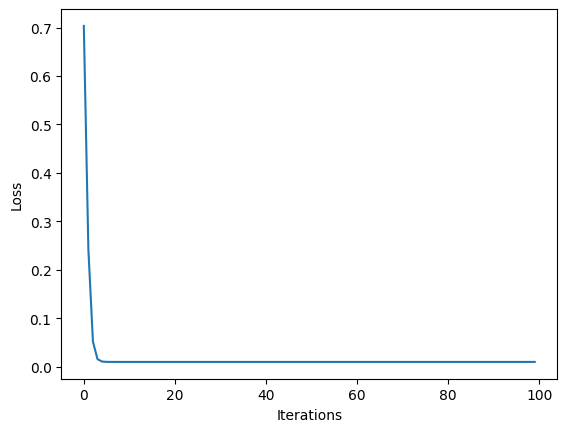

In [373]:
plt.plot(np.array(loss)) 
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

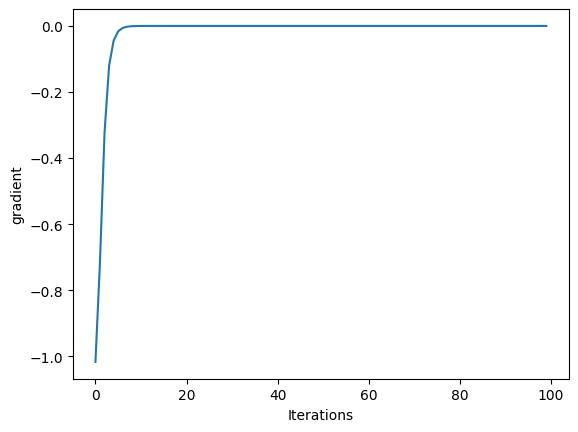

In [374]:
plt.plot(a_grad) 
plt.xlabel("Iterations")
plt.ylabel("gradient")
plt.show()